In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import ray
import ray.rllib.agents.ppo as ppo
import ray.rllib.agents.ddpg as ddpg
import ray.rllib.agents.sac as sac
import seagul.envs
import numpy as np
from numpy import pi
import gym
import pybullet_envs
from ray.rllib.models import ModelCatalog

from seagul.rllib.rllib_with_rbf.rbf_net import RBFModel1, RBFModel2
from seagul.rllib.rllib_with_rbf.mlp_net import MyKerasModel1, MyKerasModel2

Using TensorFlow backend.


In [2]:
# !! modify these as appropiate

algos = {
  "1": "SAC",
  "2": "Mustang",
  "3": 1964
}[SAC, PPO]

home_path = '/home/grabka//Documents/seagul/seagul/rllib/rllib_with_rbf/data/'

checkpoint_path = home_path + \
"/Documents/seagul/seagul/rllib/rllib_with_rbf/data/PPO/PPO_HumanoidBulletEnv-v0_mlp_2_64_2020-02-06_13-32-020ir9etn8/checkpoint_119/checkpoint-119"

In [3]:
# Some delightfully ugly python to infer where everything else is...
csv_path = '/'.join(checkpoint_path.split('/')[:-2]) + '/progress.csv'
save_name = checkpoint_path.split('/')[-3]
expr_file = "/experiment_state-" + save_name[-27:-8] + ".json"
expr_path = '/'.join(checkpoint_path.split('/')[:-3]) + expr_file

expr_data = json.load(open(expr_path))
config = expr_data['checkpoints'][-1]['config']
env_name = config['env']


df = pd.read_csv(csv_path)
#df

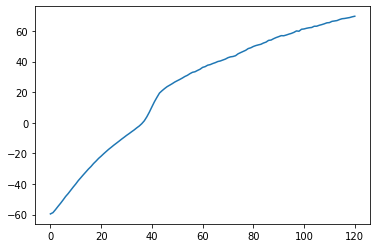

In [4]:
plt.plot(df['episode_reward_mean'])

In [6]:
ray.shutdown()
ray.init()
ModelCatalog.register_custom_model("rbf", RBFModel1)
ModelCatalog.register_custom_model("rbf_2", RBFModel2)
ModelCatalog.register_custom_model("mlp_1_256", MyKerasModel1)
ModelCatalog.register_custom_model("mlp_2_64", MyKerasModel2)

# !! change this line to reflect the algorithm you used
trainer = ppo.PPOTrainer(config)#, config['env_name'])
#trainer = ddpg.DDPGTrainer(config)
#trainer = sac.SACTrainer(config)
trainer.restore(checkpoint_path)

2020-02-06 15:06:34,617	WARNING services.py:592 -- setpgrp failed, processes may not be cleaned up properly: [Errno 1] Operation not permitted.
2020-02-06 15:06:34,618	INFO resource_spec.py:212 -- Starting Ray with 9.91 GiB memory available for workers and up to 4.96 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-02-06 15:06:34,736	WARNING services.py:856 -- Redis failed to start, retrying now.
2020-02-06 15:06:35,004	WARNING services.py:1080 -- Failed to start the dashboard. The dashboard requires Python 3 as well as 'pip install aiohttp psutil setproctitle grpcio'.
2020-02-06 15:06:35,338	INFO trainer.py:370 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2020-02-06 15:06:35,363	INFO trainer.py:517 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2020-02-06 15:06:41,211	WARNING util.py:41 -- Install gputil for GPU system

(pid=9243) Using TensorFlow backend.
(pid=9231) Using TensorFlow backend.
(pid=9242) Using TensorFlow backend.
(pid=9251) Using TensorFlow backend.
(pid=9235) Using TensorFlow backend.
(pid=9248) Using TensorFlow backend.
(pid=9249) Using TensorFlow backend.
(pid=9240) Using TensorFlow backend.
(pid=9239) Using TensorFlow backend.
(pid=9244) Using TensorFlow backend.
(pid=9233) Using TensorFlow backend.
(pid=9250) Using TensorFlow backend.
(pid=9238) Using TensorFlow backend.
(pid=9232) Using TensorFlow backend.
(pid=9229) Using TensorFlow backend.
(pid=9234) Using TensorFlow backend.
(pid=9247) Using TensorFlow backend.
(pid=9246) Using TensorFlow backend.
(pid=9245) Using TensorFlow backend.
(pid=9237) Using TensorFlow backend.
(pid=9236) Using TensorFlow backend.
(pid=9230) Using TensorFlow backend.
(pid=9241) Using TensorFlow backend.


In [6]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import pybullet_envs
%matplotlib inline

#env = gym.make(env_name)
#env.unwrapped.reset_model = det_reset_model

# !! this needs to reflect the environemnt you trained in
#env = gym.make("Pendulum-v0")
env = gym.make("Walker2DBulletEnv-v0", render=True)

In [ ]:
env._max_episode_steps = 10000
obs = env.reset()



action_hist = []
m_act_hist = []
state_hist  = []
obs_hist = []
reward_hist = []

done = False
for t in range(10000):
    # for some algorithms you can get the sample mean out, need to change the value on the index to match your env for now
    # mean_actions = out_dict['behaviour_logits'][:17]
    # actions = trainer.compute_action(obs.flatten())
    sampled_actions, _ , out_dict = trainer.compute_action(obs.flatten(),full_fetch=True)
    
    actions = sampled_actions
    
    obs, reward, done, _ = env.step(np.asarray(actions))
    
    # !! uncomment to render
    env.render()
    
    action_hist.append(np.copy(actions))
    obs_hist.append(np.copy(obs))
    reward_hist.append(np.copy(reward))

print(sum(reward_hist))
print((obs_hist))
#plt.plot(action_hist)
#plt.figure()
#plt.figure()
#plt.plot(obs_hist)
#plt.figure()

In [ ]:
# Reminder that the bahavior logits that come out are the mean and logstd (not log mean, despite the name logit)
trainer.compute_action(obs, full_fetch=True)